# MOVIE RECOMMENDATION SYSTEM
![netflix.png](netflix.png)
**Source** : netflix.com

In [1]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Dataset
df = pd.read_csv('movie_dataset.csv')
## Show Data
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


<hr>

## 1. Data Understanding and Data Wrangling

In [3]:
## Show Columns Information
df.info()
## Result: We detected missing value of few of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

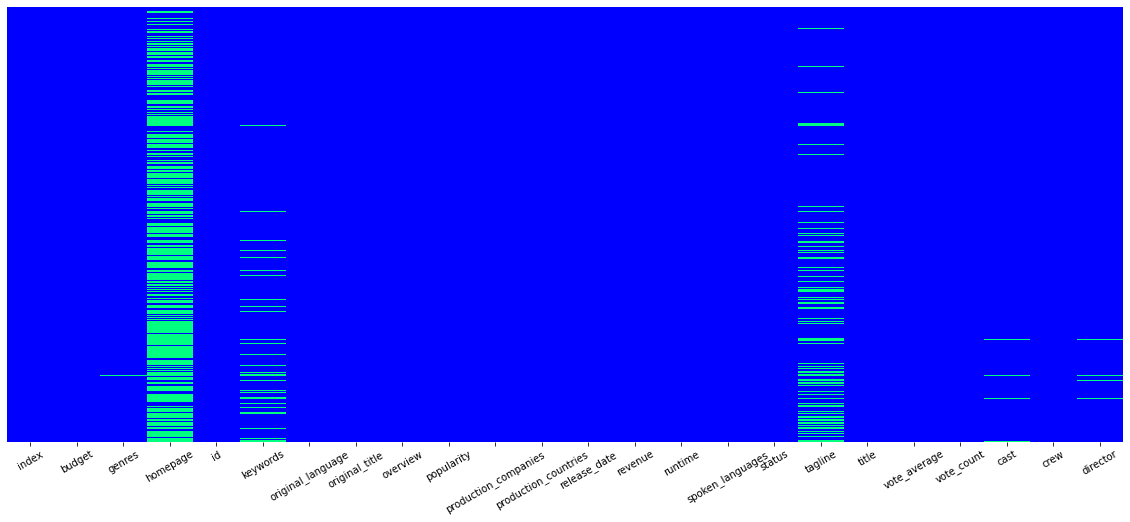

In [4]:
## Visualize Missing Value with Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isna(), cmap='winter', cbar=False, yticklabels=False)
plt.xticks(rotation=30)
plt.show()

In [5]:
## Determine features for recommendation
feature = df[['genres', 'keywords', 'cast', 'director']]
## Few of these features have missing value.
## We ommit them by keeping them empty.

In [6]:
## Build for Loop to keep missing value empty
for i in feature:
    df[i].fillna("", inplace=True)

In [7]:
## Build function to combine supporting features of recommendation
def combo(x):
    recom = x['genres'] + ' ' + x['keywords'] + ' ' + x['cast'] + ' ' + x['director']
    return recom

In [8]:
## Add as new column
df['combo_features'] = df.apply(combo, axis = 1)

In [9]:
## Show Data
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combo_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


<hr>

## 2. Recommendation System Modelling

In [10]:
## Import Package
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
## Build Model
CV = CountVectorizer()

In [12]:
## Fit and Transform Features to Model
movie_matrix = CV.fit_transform(df['combo_features'])

In [13]:
## Import Package
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
## Build Model
cos_score = cosine_similarity(movie_matrix)

Cosine Score is the model of our recommendation system.

<hr>

## 3. Apply Recommendation

In [15]:
## Define watched movie - example
watched_movie = 'Spectre'

In [16]:
## Index of Watched Movie
df[df['title'] == 'Spectre']['index'].values[0]

2

In [17]:
## Build Function
def index_by_movie(movie):
    return df[df['title'] == 'Spectre']['index'].values[0]

In [18]:
## Watched Movie by Index
df[df['index'] == 2]['title'].values[0]

'Spectre'

In [19]:
## Build Function
def movie_by_index(index):
    return df[df['index'] == index]['title'].values[0]

In [20]:
## Save index of watched movie into variable
index_watched = index_by_movie(watched_movie)

In [21]:
## Check Cosine Score
cos_score[index_watched]

array([0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
       0.        ])

In [22]:
## Show Score for Every Other Movie Index
list(enumerate(cos_score[index_watched]))
## Index number 2 - Itself

[(0, 0.12038585308576921),
 (1, 0.0761386987626881),
 (2, 0.9999999999999999),
 (3, 0.16357216402190616),
 (4, 0.2085144140570748),
 (5, 0.12510864843424488),
 (6, 0.0),
 (7, 0.19034674690672024),
 (8, 0.08891084489487741),
 (9, 0.17025130615174974),
 (10, 0.12510864843424488),
 (11, 0.3336230624913197),
 (12, 0.08695652173913045),
 (13, 0.08340576562282992),
 (14, 0.15762208124782012),
 (15, 0.16357216402190616),
 (16, 0.14980117725462766),
 (17, 0.08891084489487741),
 (18, 0.03806934938134405),
 (19, 0.08891084489487741),
 (20, 0.08512565307587487),
 (21, 0.08512565307587487),
 (22, 0.047836487323493986),
 (23, 0.18650096164806276),
 (24, 0.07372097807744857),
 (25, 0.0),
 (26, 0.11821656093586509),
 (27, 0.08512565307587487),
 (28, 0.08512565307587487),
 (29, 0.48900964692182586),
 (30, 0.16357216402190616),
 (31, 0.12510864843424488),
 (32, 0.15762208124782012),
 (33, 0.15762208124782012),
 (34, 0.0),
 (35, 0.09100315103865803),
 (36, 0.1276884796138123),
 (37, 0.09325048082403138)

In [23]:
## Add into Variable
similarity_movie = list(enumerate(cos_score[index_watched]))

In [24]:
## Sort by Ascending
sorted(similarity_movie, key=lambda x:x[1])

[(6, 0.0),
 (25, 0.0),
 (34, 0.0),
 (42, 0.0),
 (57, 0.0),
 (73, 0.0),
 (77, 0.0),
 (100, 0.0),
 (110, 0.0),
 (118, 0.0),
 (120, 0.0),
 (133, 0.0),
 (135, 0.0),
 (137, 0.0),
 (146, 0.0),
 (154, 0.0),
 (161, 0.0),
 (173, 0.0),
 (177, 0.0),
 (184, 0.0),
 (192, 0.0),
 (211, 0.0),
 (214, 0.0),
 (226, 0.0),
 (231, 0.0),
 (239, 0.0),
 (250, 0.0),
 (251, 0.0),
 (255, 0.0),
 (264, 0.0),
 (265, 0.0),
 (272, 0.0),
 (284, 0.0),
 (293, 0.0),
 (301, 0.0),
 (317, 0.0),
 (318, 0.0),
 (321, 0.0),
 (323, 0.0),
 (326, 0.0),
 (327, 0.0),
 (328, 0.0),
 (333, 0.0),
 (338, 0.0),
 (343, 0.0),
 (347, 0.0),
 (357, 0.0),
 (360, 0.0),
 (373, 0.0),
 (378, 0.0),
 (382, 0.0),
 (385, 0.0),
 (390, 0.0),
 (391, 0.0),
 (393, 0.0),
 (395, 0.0),
 (397, 0.0),
 (404, 0.0),
 (406, 0.0),
 (407, 0.0),
 (409, 0.0),
 (413, 0.0),
 (416, 0.0),
 (417, 0.0),
 (418, 0.0),
 (422, 0.0),
 (423, 0.0),
 (427, 0.0),
 (429, 0.0),
 (430, 0.0),
 (431, 0.0),
 (434, 0.0),
 (436, 0.0),
 (438, 0.0),
 (440, 0.0),
 (441, 0.0),
 (443, 0.0),
 (445, 

In [25]:
## Sort by Descending
sorted(similarity_movie, key=lambda x:x[1], reverse = True)[1:]

[(29, 0.48900964692182586),
 (11, 0.3336230624913197),
 (354, 0.2553769592276246),
 (183, 0.25021729686848976),
 (1100, 0.25021729686848976),
 (1137, 0.25021729686848976),
 (1999, 0.25021729686848976),
 (2156, 0.25021729686848976),
 (3336, 0.25021729686848976),
 (3373, 0.24573659359149527),
 (782, 0.24077170617153845),
 (3494, 0.24077170617153845),
 (4638, 0.24077170617153845),
 (1177, 0.23995690956687132),
 (3352, 0.23643312187173018),
 (147, 0.2323209277987099),
 (219, 0.22750787759664506),
 (1958, 0.22750787759664506),
 (444, 0.22470176588194152),
 (1192, 0.22470176588194152),
 (2167, 0.22227711223719354),
 (1024, 0.22116293423234573),
 (206, 0.2173913043478261),
 (1013, 0.2173913043478261),
 (3986, 0.2173913043478261),
 (249, 0.21281413268968719),
 (256, 0.21281413268968719),
 (329, 0.21281413268968719),
 (330, 0.21281413268968719),
 (339, 0.21281413268968719),
 (1068, 0.21281413268968719),
 (3348, 0.21281413268968719),
 (4135, 0.21281413268968719),
 (4, 0.2085144140570748),
 (260,

In [26]:
## Add into Variable
sorted_movie = sorted(similarity_movie, key=lambda x:x[1], reverse = True)[1:]

In [27]:
## Show Sample Name of Movie recommended
sorted_movie[1][0]

11

In [28]:
## Show List of Movies Recommended
movie_by_index(sorted_movie[1][0])

'Quantum of Solace'

In [29]:
## Show top 5 Movies recommended by Model
print(f'Top 5 Movies Recommendations Based on Your Watched Movie : {watched_movie}')
print('='*70)
count = 0
for i in sorted_movie:
    print(movie_by_index(i[0]))
    count += 1
    if count == 5:
        break

Top 5 Movies Recommendations Based on Your Watched Movie : Spectre
Skyfall
Quantum of Solace
The Girl with the Dragon Tattoo
The Hunger Games: Catching Fire
Johnny English Reborn
